# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [ ]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("./drive/My Drive/hw1_data/winequality-train.csv")
test_df = pd.read_csv("./drive/My Drive/hw1_data/winequality-test.csv")

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [ ]:
# print shape of the train and test sets

print(f"Shape of the train dataset: {train_df.shape}")
print(f"Shape of the test dataset: {test_df.shape}")


# show random samples from the training data

train_df.sample(5)

Shape of the train dataset: (5198, 13)
Shape of the test dataset: (1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
1458,7.2,0.31,0.24,1.4,0.057,17.0,117.0,0.99280,3.16,0.35,10.5,0,0
1590,6.4,0.16,0.44,1.2,0.051,39.0,122.0,0.99058,3.11,0.75,11.3,0,1
1709,4.8,0.65,0.12,1.1,0.013,4.0,10.0,0.99246,3.32,0.36,13.5,0,0
2122,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1,0
1034,7.3,0.26,0.31,1.6,0.040,39.0,173.0,0.99180,3.19,0.51,11.4,0,0


In [ ]:
# print information about the datasets (Is there any missing value? or Categorical feature?)

train_df.info()
print() # for a new line between infos
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
 12  quality               5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298


# 4) Define train and test labels

In [ ]:
# make sure you remove the labels from datasets

train_labels = train_df.pop('quality')
test_labels = test_df.pop('quality')

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [ ]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df, train_labels, test_size=0.3, random_state=2021)

2- FineTune minimum sample split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  dtree = DecisionTreeClassifier(min_samples_split=min_samples_split, criterion='entropy', random_state=2021)
  dtree.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_acc = dtree.score(x_train, y_train)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = dtree.score(x_val, y_val)
  val_results.append(val_acc)

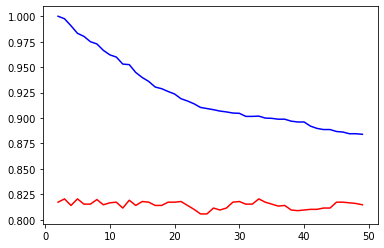

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [ ]:
# Choose the best minimum split sample based on the plot
Best_minSampl = min_samples_splits[np.argmax(val_results)] # is equal to 3

# Train decision tree using the full training data and the best minimum split sample
best_dtree = DecisionTreeClassifier(min_samples_split=Best_minSampl, criterion='entropy', random_state=2021)
best_dtree.fit(train_df, train_labels)

# Estimate the prediction of the test data
test_pred = best_dtree.predict(test_df)

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_labels, test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Testing Accuracy = 83.3718%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = [k for k in range(1,30) if k % 2 != 0]

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  
  val_acc = knn.score(x_val, y_val)
  accuracies.append(val_acc)

print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

Best Validation Accuracy = 81.4744%


In [ ]:
# Train k-NN using the full training data with the best K that you found

Best_k = kVals[np.argmax(accuracies)] # is equal to 1

best_knn = KNeighborsClassifier(n_neighbors=Best_k)
best_knn.fit(train_df, train_labels)

# Testing

test_pred = best_knn.predict(test_df)
TestAcc = accuracy_score(test_labels, test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Testing Accuracy = 83.2948%


# 7) Notebook & Report

Notebook: We may just look at your notebook results; so make sure each cell is run and outputs are there.

Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook; this should be like an abstract of a paper or the executive summary.

Must include statements such as:

( Include the problem definition: 1-2 lines )

(Talk about any preprocessing you did, explain your reasoning)

(Talk about train/val/test sets, size and how split)

(State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data….")

(Comment on the speed of the algorithms and anything else that you deem important/interesting)


You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.



# Write your report in this cell

## My Report
**Problem Definition:** 

With the given dataset `Wine Quality Dataset`, which contains 4898 rows and 12 attributes where each row is a unique wine, our task was to implement Decision Tree and k-NN classifiers to classify and predict a given wine's quality as either 0 or 1. 

**For preprocessing:** 

Printed out the shapes of both the train and test data sets and checked whether there are any missing values and whether there are categorical features. There were no missing values to be filled or imputed, and there were no categorical features so there wasn't a reason to use `pd.get_dummies()` / one-hot-encoding.

Also, no numeric features were scaled or standardized since I think we are not meant to do any scaling/standardization in the scope of this homework, but given chance, I would have used `StandardScaler` from from `sklearn.preprocessing` to scale the features to improve the accuracy scores I have obtained.

Seperated the labels from features in both train and test datasets with `.pop()` method.

**Train/val/test sets, size and how split:** 

Split the training data to 70% training and 30% validation, and used the validation data and the accuracy score obtained with validation data to determine the best hyper-parameters for the Decision Tree and k-NN classifiers. Test set was given to us in a seperate file and was only used to print out the accuracy score on the test set.

**Test results, best hyperparameters, classification accuracy scores:**

We have obtained the best results with the Decision Tree Classifier (`hyperparameters=(min_samples_split=3, criterion='entropy', random_state=2021)`, `the rest is default hyperparameters`) , giving classification accuracy of **83.3718%** on test data.

k-NN Classifier (`hyperparameters=(n_neighbors=1)`, `the rest is default hyperparameters`) , gave a classification accuracy of **83.2948%** on test data.

**Comments:**

Since our dataset is not large, I think the speeds of the both algorithms are in the acceptable range. They are not painfully slow like one of the examples we avoided doing in the recitation :D Other than that, I found it weird that, with my current random state, adjusting hyperparameters mostly did not seem to lead to any improvements on the accuracy score. What can we say about this?

Can't wait to dive into more complex and harder homeworks in the future! **DON'T FORGET** to check the 9th section if you have time :)

# 8) Submission
You will submit this homework via SUCourse.


Please read this document again before submitting it.

Please submit your **"share link" INLINE in Sucourse submissions.** That is we should be able to click on the link and go there and run (and possibly also modify) your code.

For us to be able to modify, in case of errors etc, you should get your "share link" as **share with anyone in edit mode** 

Download the **.ipynb and the .html** file and upload both of them to Sucourse.
 
Please do your assignment individually, do not copy from a friend or the Internet. Plagiarized assignments will receive -100.


#9) WHAT IF?

Let's keep going, and try to get better accuracy scores! I mean, I would regret not doing the things I mentioned in my report :p

In [ ]:
# Extra Cell
numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] # these are the numeric columns

train_df_num = train_df[numeric_cols]
test_df_num = test_df[numeric_cols]

In [ ]:
# Extra Cell
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_train_df_num = pd.DataFrame(sc.fit_transform(train_df_num), columns=numeric_cols)
scaled_train_df = pd.concat((scaled_train_df_num, train_df["wine type"]), axis = 1)

scaled_test_df_num = pd.DataFrame(sc.fit_transform(test_df_num), columns=numeric_cols)
scaled_test_df = pd.concat((scaled_test_df_num, test_df["wine type"]), axis = 1)

In [ ]:
# Extra Cell
scaled_x_train, scaled_x_val, scaled_y_train, scaled_y_val = train_test_split(scaled_train_df, train_labels, test_size=0.3, random_state=2021)

In [ ]:
# Extra Cell
# initialize the values of k to be a list of odd numbers between 1 and 30
scaled_kVals = [k for k in range(1,30) if k % 2 != 0]

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
scaled_accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in scaled_kVals:
  # Follow what we did in decision tree part

  scaled_knn = KNeighborsClassifier(n_neighbors=k)
  scaled_knn.fit(scaled_x_train, scaled_y_train)
  
  scaled_val_acc = scaled_knn.score(scaled_x_val, scaled_y_val)
  scaled_accuracies.append(scaled_val_acc)

print("Best Validation Accuracy = %.4f%%" % (np.max(scaled_accuracies)*100))

Best Validation Accuracy = 84.3590%


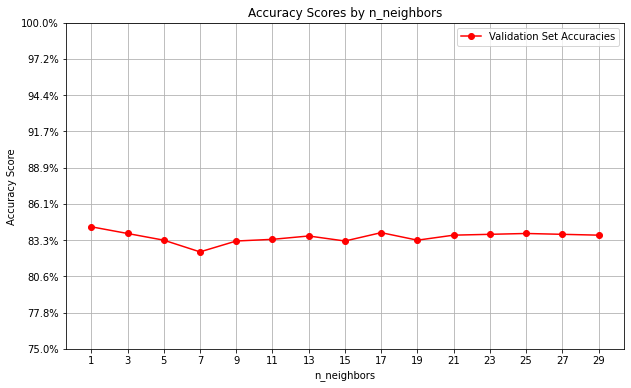

In [ ]:
# Extra Cell
# This code was taken and heavily modified from CS210 Recitation Decision Trees Notebook of last semester =)
# Probably was originally written by CS210 TA Hasan Alp Boz but I am not sure

fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(scaled_accuracies, color="r", marker="o", ls="-", label="Validation Set Accuracies")

ax.set_title("Accuracy Scores by n_neighbors")

ax.set_xlabel("n_neighbors")
ax.set_xticks(np.arange(len(scaled_kVals)))
ax.set_xticklabels(scaled_kVals)
ax.set_ylabel("Accuracy Score")
y_ticks = np.linspace(0.75, 1.0, 10)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{y_tick * 100:.1f}%" for y_tick in y_ticks])

ax.legend()
plt.grid()

In [ ]:
# Extra Cell

# Train k-NN using the full training data with the best K that you found

scaled_Best_k = scaled_kVals[np.argmax(scaled_accuracies)] # is equal to 1

scaled_best_knn = KNeighborsClassifier(n_neighbors=scaled_Best_k)
scaled_best_knn.fit(scaled_train_df, train_labels)

# Testing

scaled_test_pred = scaled_best_knn.predict(scaled_test_df)
scaled_TestAcc = accuracy_score(test_labels, scaled_test_pred)
print("Testing Accuracy = %.4f%%" % (scaled_TestAcc * 100))

Testing Accuracy = 85.2194%


From **83.2948%** to **85.2194%**

*IT BARELY IMPROVED*

I want my time back ; _ ;

Damn you random state 2021! 

I must have an unbalanced validation set from the split I think???